In [1]:
from gsheets import Sheets
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
sheets = Sheets.from_files('./client_secrets.json', './storage.json')
URL = 'https://docs.google.com/spreadsheets/d/1fAvLX5NWtjkZm5ioOupdZ7_4LqTJVeFcgIsQ4rxsnFM/edit'
s = sheets.get(URL)

In [3]:
ws = s.find("Form Responses 1")

In [4]:
table = ws.values()[:-2]
headers = table.pop(0)

In [5]:
df = pd.DataFrame(table, columns=headers)

In [6]:
import json
cols = df.columns
cols_map = {i : q for i, q in enumerate(cols)}
print(json.dumps(cols_map, indent=4, sort_keys=False))

{
    "0": "Timestamp",
    "1": "Do you consent to the terms of this survey?",
    "2": "Do you have any experience theoretically characterizing the expressive power of a graph neural network?",
    "3": "Do you have any experience empirically evaluating graph neural networks on real-world tasks or datasets?",
    "4": "List some real-world applications of graph machine learning with which you are familiar.",
    "5": "Briefly describe the type of graph machine learning work that you do.",
    "6": "Please select all the options that apply to you.",
    "7": "How do you define expressive power?",
    "8": "How clearly defined is the expressive power of graph neural networks?",
    "9": "How consistently defined is the expressive power of graph neural networks?",
    "10": "How relevant are common conceptualizations of expressive power to the real-world applications of graph machine learning that you listed in the Background Questions section?",
    "11": "Please select all of the foll

In [7]:
paper_Q_map = {i : str(i) for i in range(14)}

for i in range(15, 21): 
    paper_Q_map[i] = str(15) + chr(i - 15 + 97)

for i in range(21, 24):
    paper_Q_map[i] = str(i - 5)
    
for i in range(25, 31):
    paper_Q_map[i] = str(i - 5)
    
for i in range(32, 38):
    paper_Q_map[i] = str(27) + chr(i - 32 + 97)
    
for i in range(38, 40):
    paper_Q_map[i] = str(i - 10)

for c in paper_Q_map:
    print(c, ":", paper_Q_map[c])

0 : 0
1 : 1
2 : 2
3 : 3
4 : 4
5 : 5
6 : 6
7 : 7
8 : 8
9 : 9
10 : 10
11 : 11
12 : 12
13 : 13
15 : 15a
16 : 15b
17 : 15c
18 : 15d
19 : 15e
20 : 15f
21 : 16
22 : 17
23 : 18
25 : 20
26 : 21
27 : 22
28 : 23
29 : 24
30 : 25
32 : 27a
33 : 27b
34 : 27c
35 : 27d
36 : 27e
37 : 27f
38 : 28
39 : 29


In [8]:
wordcloud_cols = [4, 5, 7, 13, 21]
bar_cols = [2, 3, 6, 11, 25]
hist_cols = [8, 9, 10, 12, 15] + list(range(16, 21)) + [22, 23] + list(range(26, 31)) + list(range(32, 40))

curr_cols = wordcloud_cols + bar_cols + hist_cols
for c in cols_map:
    if c not in curr_cols:
        print(c, ":", cols_map[c])

0 : Timestamp
1 : Do you consent to the terms of this survey?
14 : Do you have additional thoughts in response to the questions in this section?
24 : Do you have additional thoughts in response to the questions in this section?
31 : Do you have additional thoughts in response to the questions in this section?
40 : Do you have additional thoughts in response to the questions in this section?
41 : Do you have any comments or feedback on the questions in this survey?


In [9]:
import os
from pathlib import Path
import shutil

dirpath = Path('.') / 'survey_plots'
if dirpath.exists() and dirpath.is_dir():
    shutil.rmtree(dirpath)
os.makedirs("./survey_plots")

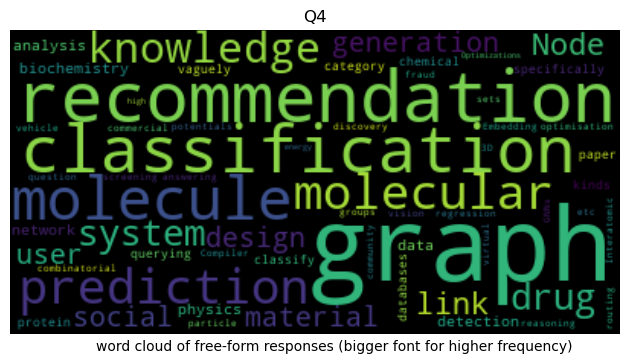

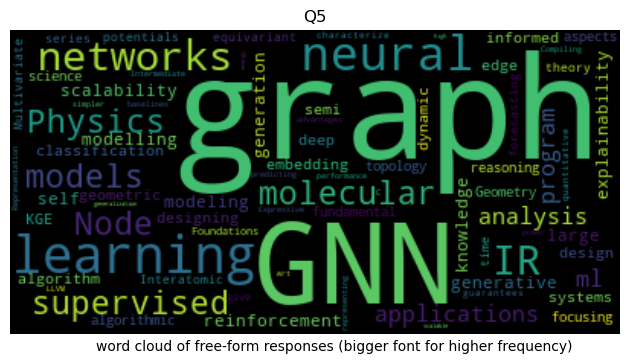

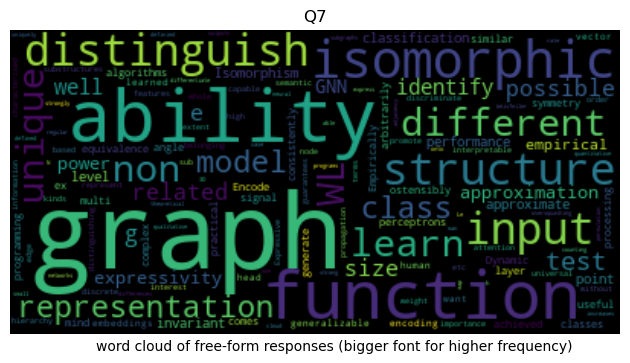

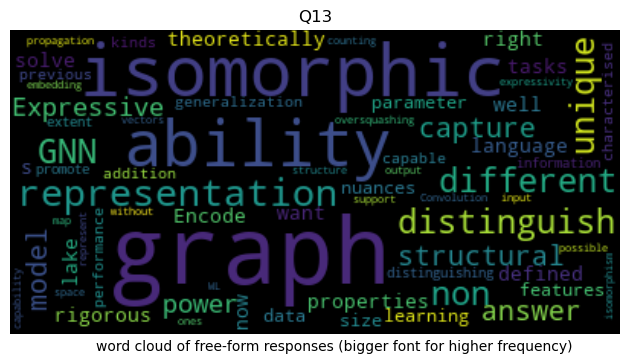

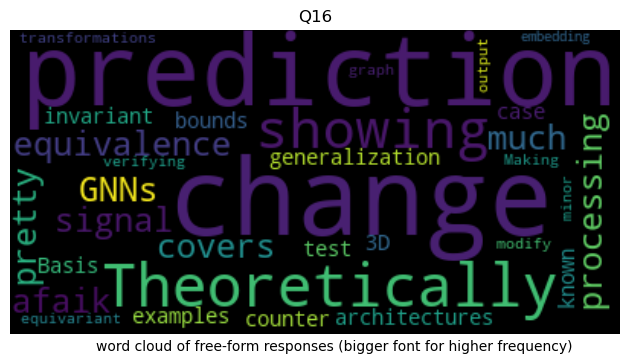

In [10]:
for c in wordcloud_cols:
    text = " ".join(list(df.iloc[:, c]))
    plt.figure()
    wordcloud = WordCloud().generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title("Q" + str(paper_Q_map[c]))
    text = "word cloud of free-form responses (bigger font for higher frequency)"
    plt.figtext(0.53, 0.15, text, wrap=True, horizontalalignment='center', fontsize=10)
    plt.axis("off")
    plt.tight_layout()
    plt.savefig("./survey_plots/{}.pdf".format("Q" + str(paper_Q_map[c])))

In [11]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels)

2
3
6
11
25


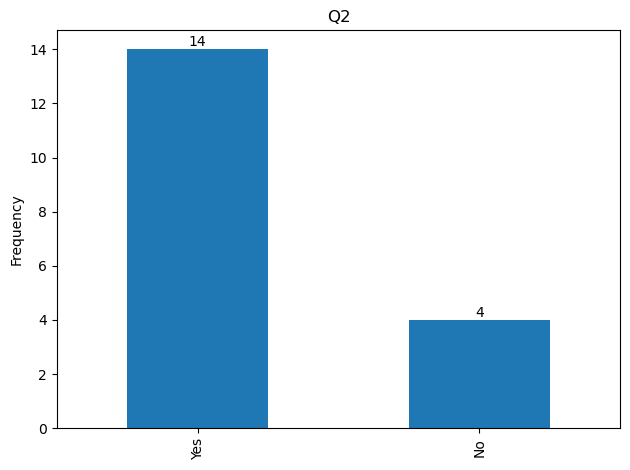

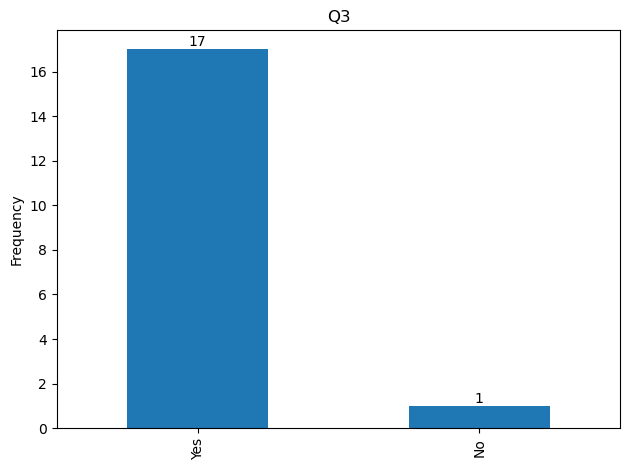

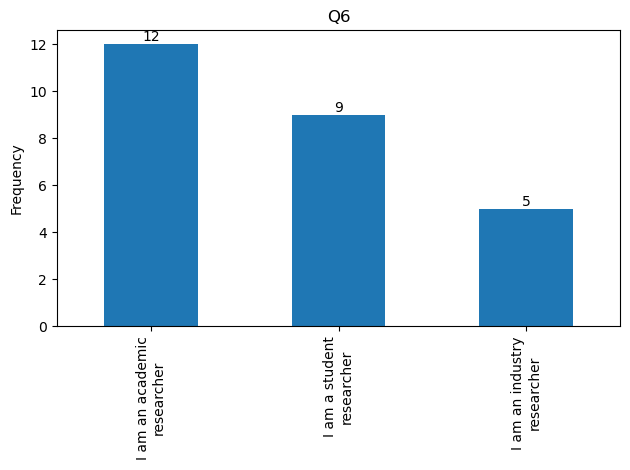

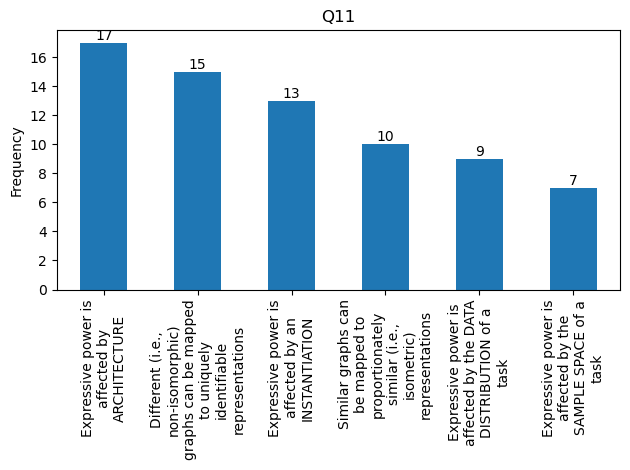

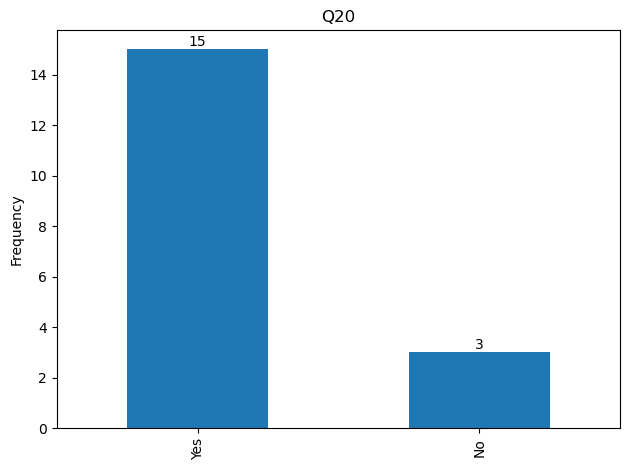

In [12]:
for c in bar_cols:
    print(c)
    plt.figure()
    ax = df.iloc[:, c].str.split(r'(?<!\.),').map(lambda elements: [e.strip() for e in elements]).explode().value_counts().plot(kind='bar')
    plt.ylabel("Frequency")
    plt.title("Q" + str(paper_Q_map[c]))
    ax.bar_label(ax.containers[0])
    wrap_labels(ax, 20)
    plt.tight_layout()
    plt.savefig("./survey_plots/{}.pdf".format("Q" + str(paper_Q_map[c])))

/var/folders/8m/njp7bcbj6wbfvt5l__spxy_00000gn/T/ipykernel_4432/3474955537.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


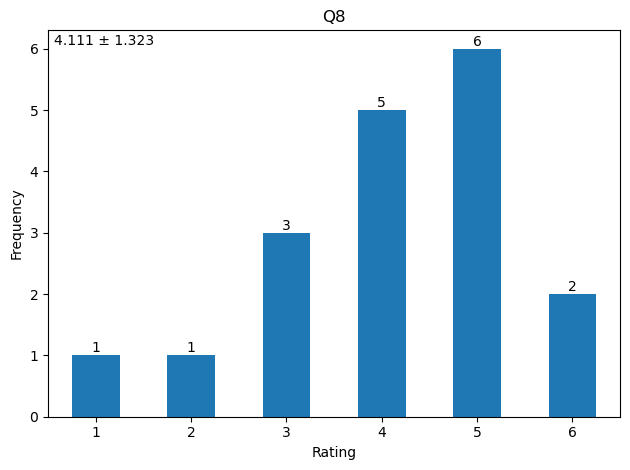

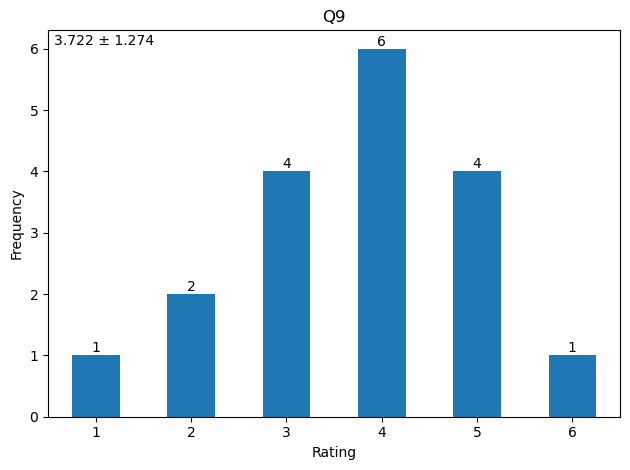

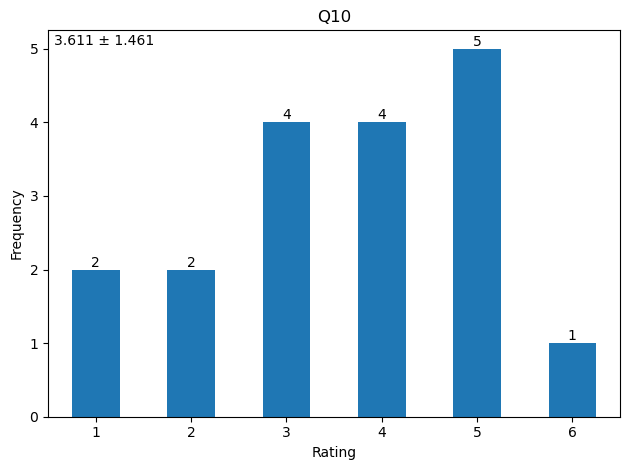

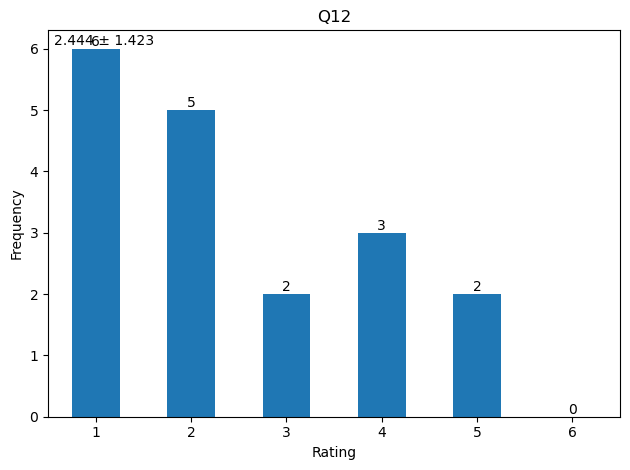

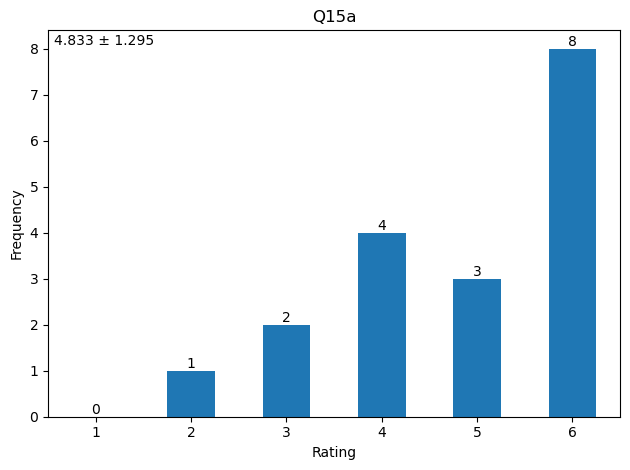

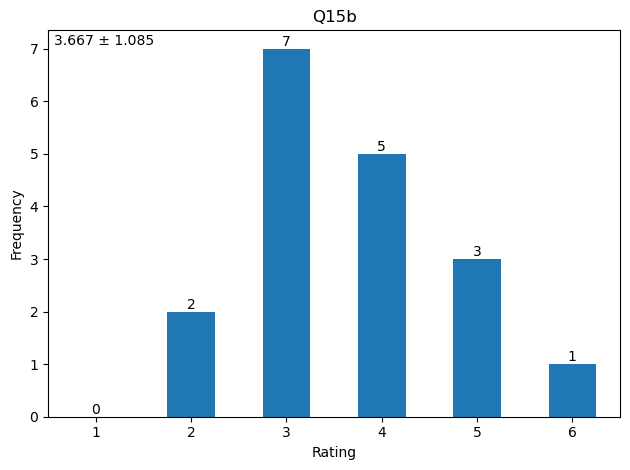

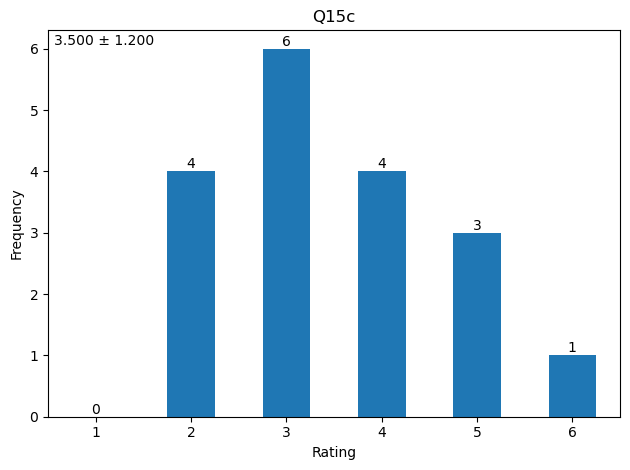

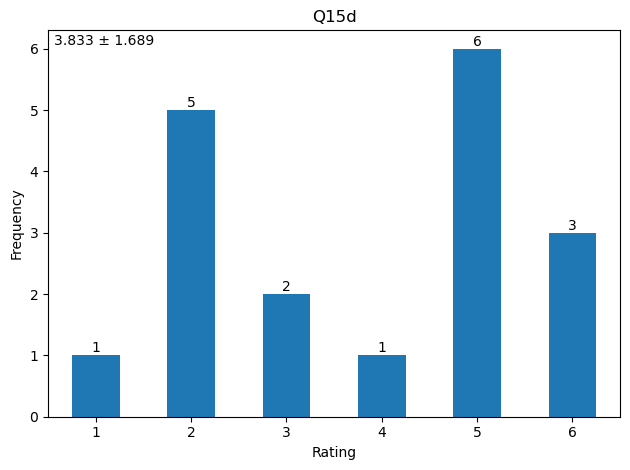

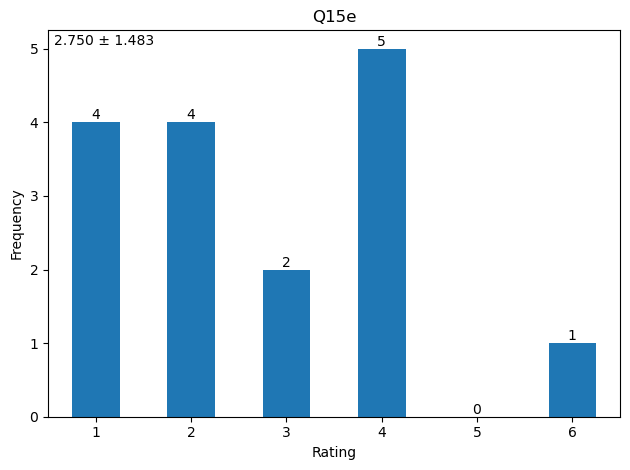

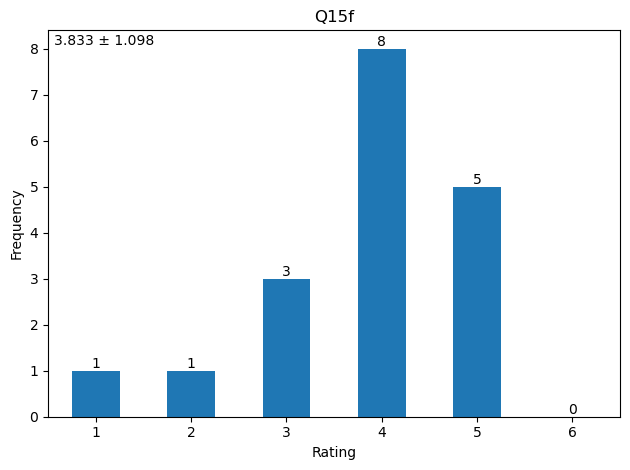

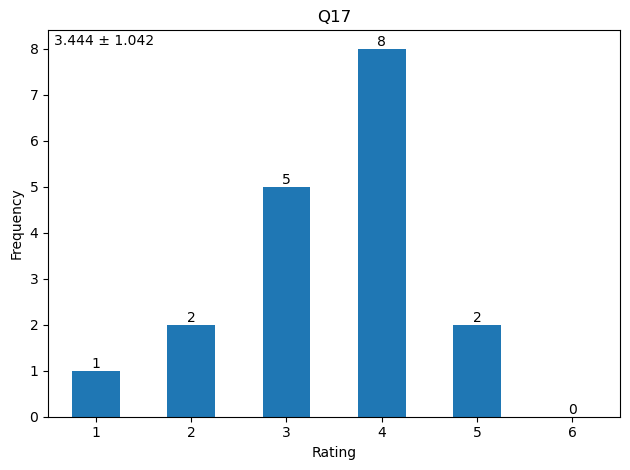

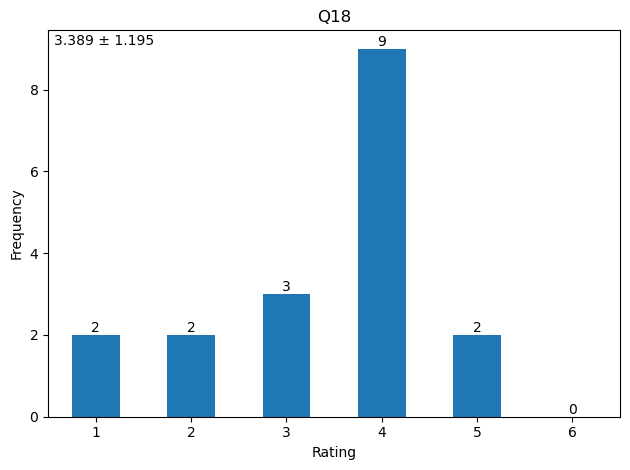

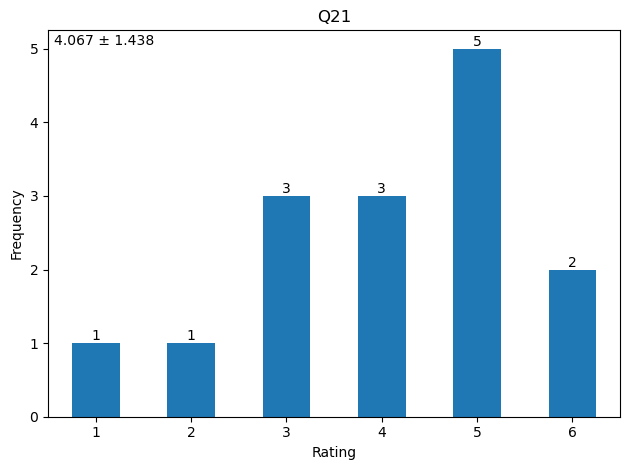

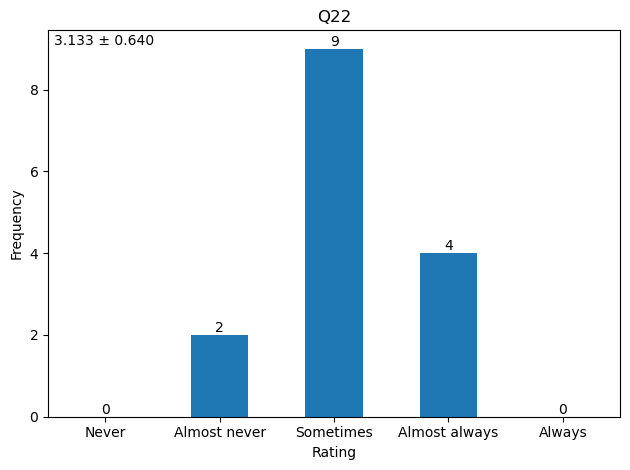

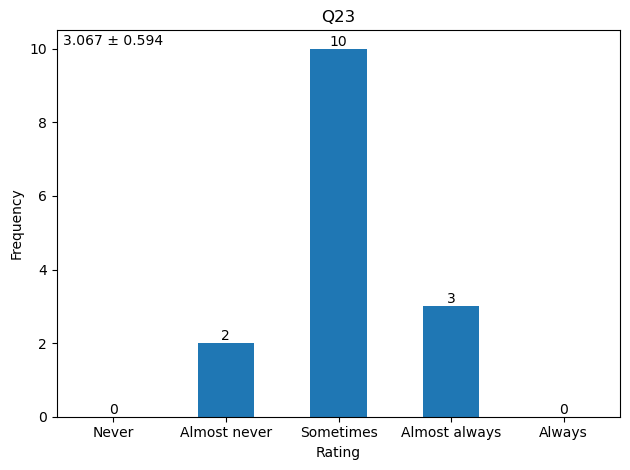

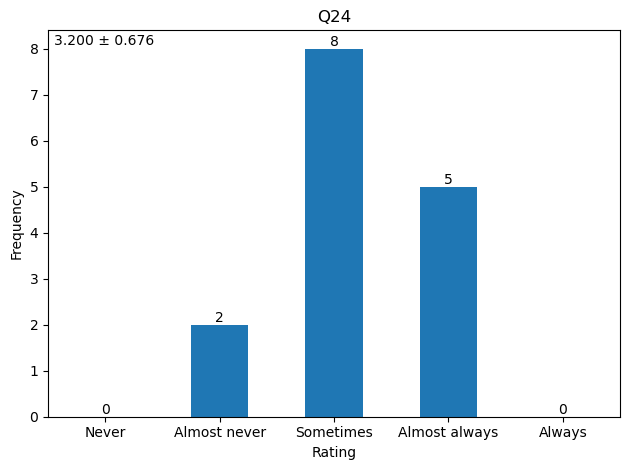

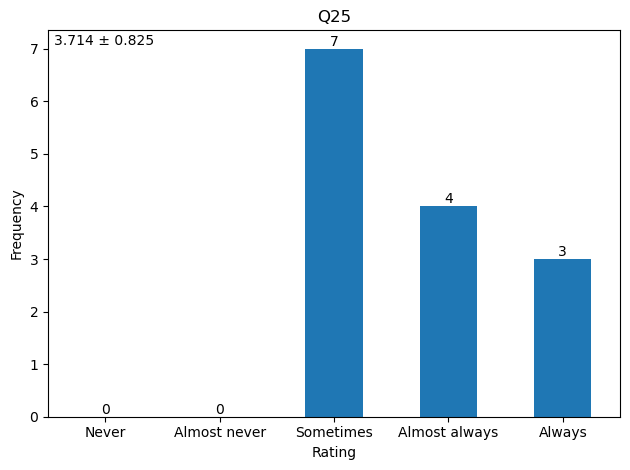

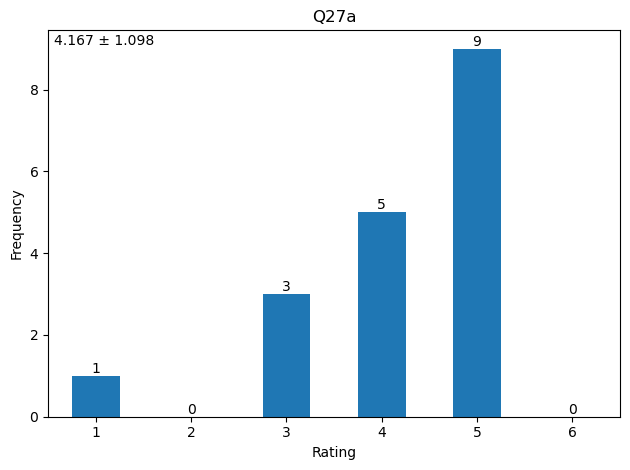

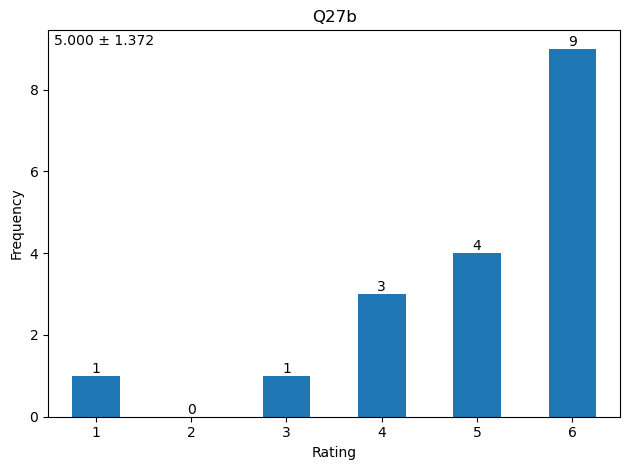

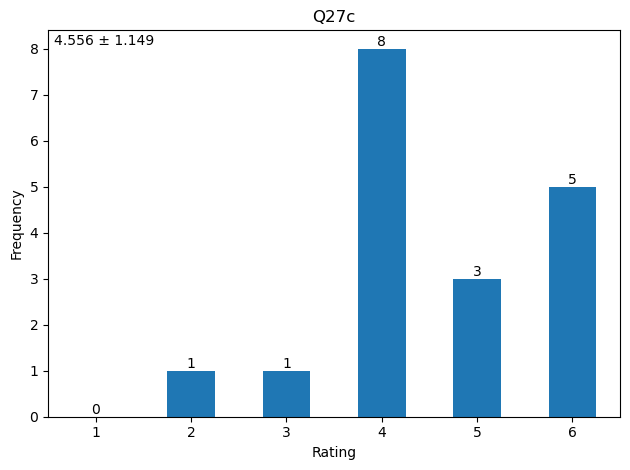

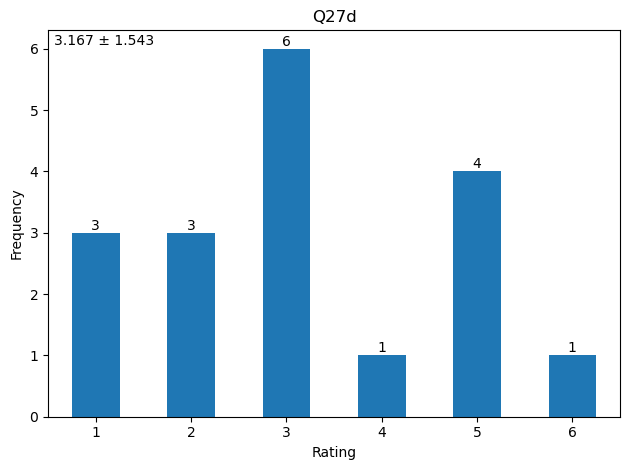

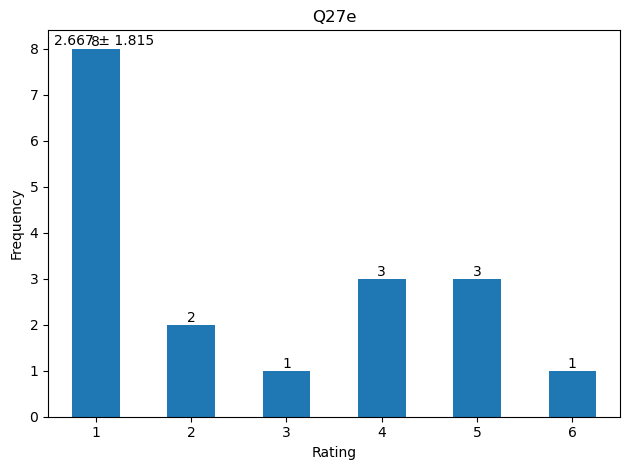

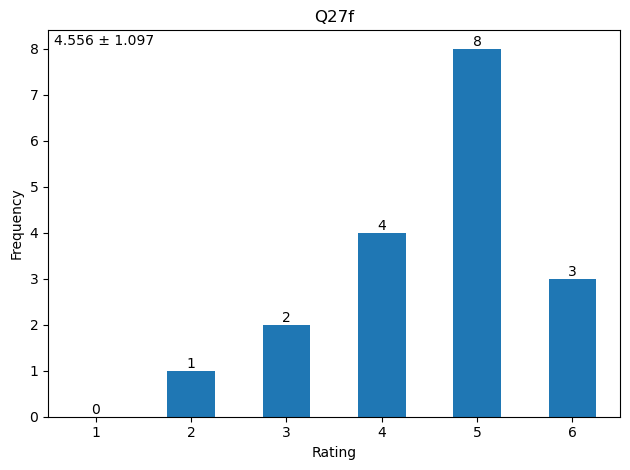

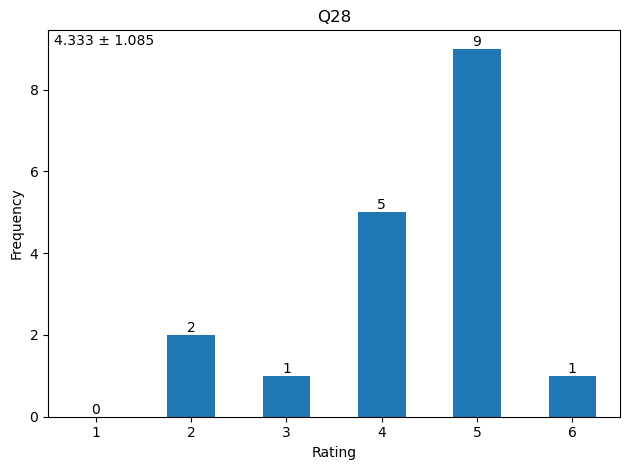

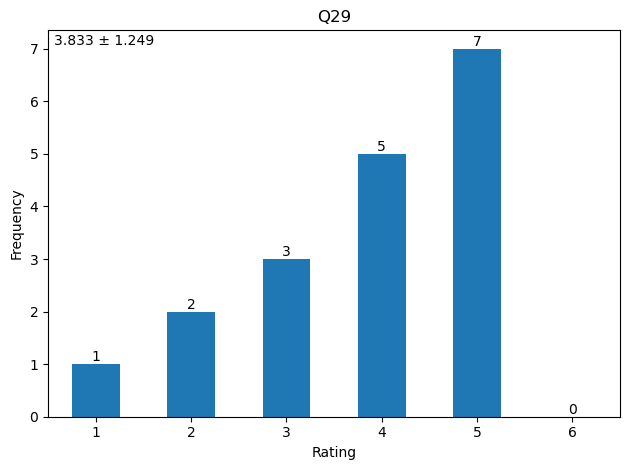

In [13]:
import numpy as np

for c in hist_cols:
    plt.figure()
    s = df.iloc[:, c].replace('', np.nan).astype(float)
    mu = s.mean()
    sig = s.std()
    dist_str = ("%0.3f" % mu) + " ± " + ("%0.3f" % sig)
    s = s.value_counts().sort_index()
    s.index = s.index.map(int)
    if c in [27, 28, 29, 30]:
        s = s.reindex(range(1, 6), fill_value=0).set_axis([
            "Never",
            "Almost never",
            "Sometimes",
            "Almost always",
            "Always"
        ])
    else:
        s = s.reindex(range(1, 7), fill_value=0)
    ax = s.plot(kind='bar', rot=0)
    ax.bar_label(ax.containers[0])
    plt.xlabel("Rating")
    plt.ylabel("Frequency")
    plt.title("Q" + str(paper_Q_map[c]))
    plt.text(.01, .99, dist_str, ha='left', va='top', transform=ax.transAxes)
    plt.tight_layout()
    plt.savefig("./survey_plots/{}.pdf".format("Q" + str(paper_Q_map[c])))

In [14]:
!tar chvfz survey_plots.tar.gz ./survey_plots

a ./survey_plots
a ./survey_plots/Q15d.pdf
a ./survey_plots/Q13.pdf
a ./survey_plots/Q12.pdf
a ./survey_plots/Q15e.pdf
a ./survey_plots/Q10.pdf
a ./survey_plots/Q11.pdf
a ./survey_plots/Q15f.pdf
a ./survey_plots/Q15b.pdf
a ./survey_plots/Q29.pdf
a ./survey_plots/Q28.pdf
a ./survey_plots/Q15c.pdf
a ./survey_plots/Q15a.pdf
a ./survey_plots/Q16.pdf
a ./survey_plots/Q9.pdf
a ./survey_plots/Q8.pdf
a ./survey_plots/Q17.pdf
a ./survey_plots/Q5.pdf
a ./survey_plots/Q4.pdf
a ./survey_plots/Q25.pdf
a ./survey_plots/Q6.pdf
a ./survey_plots/Q7.pdf
a ./survey_plots/Q24.pdf
a ./survey_plots/Q18.pdf
a ./survey_plots/Q20.pdf
a ./survey_plots/Q3.pdf
a ./survey_plots/Q2.pdf
a ./survey_plots/Q21.pdf
a ./survey_plots/Q23.pdf
a ./survey_plots/Q22.pdf
a ./survey_plots/Q27d.pdf
a ./survey_plots/Q27e.pdf
a ./survey_plots/Q27f.pdf
a ./survey_plots/Q27b.pdf
a ./survey_plots/Q27c.pdf
a ./survey_plots/Q27a.pdf
